# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
#done
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
df=pd.merge(study_results,mouse_metadata,how='inner',on=['Mouse ID'])
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
#done
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
#done sorta, doesn't exactly match
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#df['Mouse ID'].value_counts() #g989 appears 13 rows
#df.groupby(['Mouse ID','Timepoint']).filter(lambda x:x['Mouse ID']=='g989'>1)
test=df[(df['Mouse ID']=='g989')]['Mouse ID'].to_numpy()
print(test)

['g989' 'g989' 'g989' 'g989' 'g989' 'g989' 'g989' 'g989' 'g989' 'g989'
 'g989' 'g989' 'g989']


In [4]:
#done
# Optional: Get all the data for the duplicate mouse ID. 
df[(df['Mouse ID']=='g989')]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#done
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dfclean=df.drop_duplicates(subset=['Mouse ID'],keep='first',inplace=False,ignore_index=False)
dfclean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
#done
# Checking the number of mice in the clean DataFrame.
dfclean['Mouse ID'].count()

249

## Summary Statistics

In [7]:
#done
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
dfmeantumorvolume=df.groupby('Drug Regimen').mean(numeric_only=True)['Tumor Volume (mm3)']
dfmediantumorvolume=df.groupby('Drug Regimen').median(numeric_only=True)['Tumor Volume (mm3)']
dfvariancetumorvolume=df.groupby('Drug Regimen').var(numeric_only=True)['Tumor Volume (mm3)']
dfstdtumorvolume=df.groupby('Drug Regimen').std(numeric_only=True)['Tumor Volume (mm3)']
dfsemtumorvolume=df.groupby('Drug Regimen').sem(numeric_only=True)['Tumor Volume (mm3)']

dfsummary=pd.DataFrame({
    'Mean Tumor Volume':dfmeantumorvolume,
    'Median Tumor Volume':dfmediantumorvolume,
    'Variance Tumor Volume':dfvariancetumorvolume,
    'Tumor Volume Std. Dev.':dfstdtumorvolume,
    'Tumor Volume Std. Err.':dfsemtumorvolume,
})
dfsummary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#need: set caption
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
dfstat=df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
dfstat

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

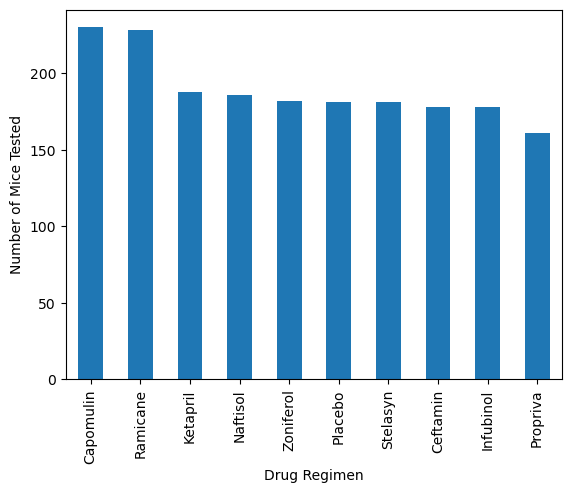

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
dftpdr=df.groupby(['Drug Regimen']).count()['Timepoint']
dftpdr=dftpdr.sort_values(ascending=False)
ax=dftpdr.plot(kind='bar')
ax.set_ylabel('Number of Mice Tested')

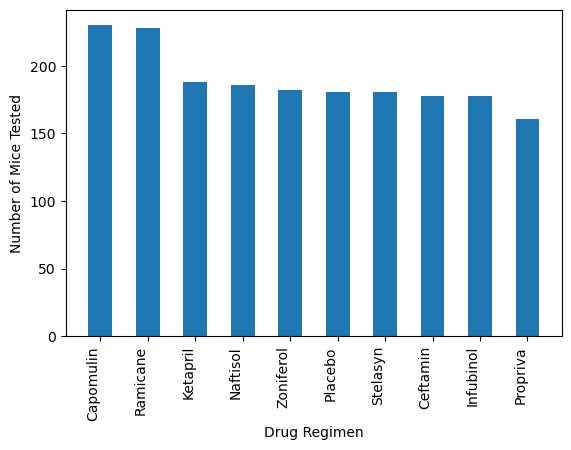

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
dftpdr=df.groupby(['Drug Regimen']).count()['Timepoint']
dftpdr=dftpdr.sort_values(ascending=False)
fig,ax=plt.subplots()
ax.bar(dftpdr.index,dftpdr,width=.5)
ax.set_ylabel('Number of Mice Tested')
ax.set_xlabel('Drug Regimen')
fig.autofmt_xdate(rotation=90)
plt.show()

Text(0, 0.5, 'Sex')

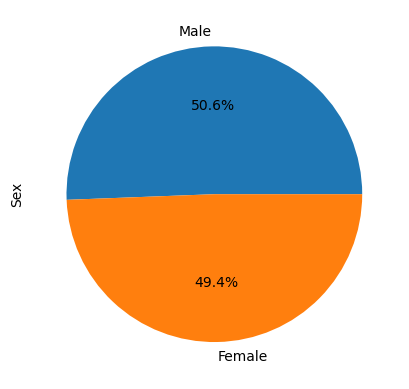

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
dfsx1=df.groupby(['Sex']).count()['Mouse ID']
dfsx1=dfsx1.sort_values(ascending=False)
ax1=dfsx1.plot(kind='pie',autopct='%1.1f%%')
ax1.set_ylabel('Sex')

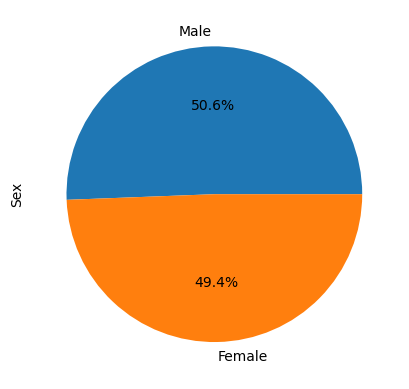

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
dfsx2=df.groupby(['Sex']).count()['Mouse ID']
dfsx2=dfsx2.sort_values(ascending=False)
fig2,ax2=plt.subplots()
ax2.pie(dfsx2,labels=dfsx2.index,autopct='%1.1f%%')
ax2.set_ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

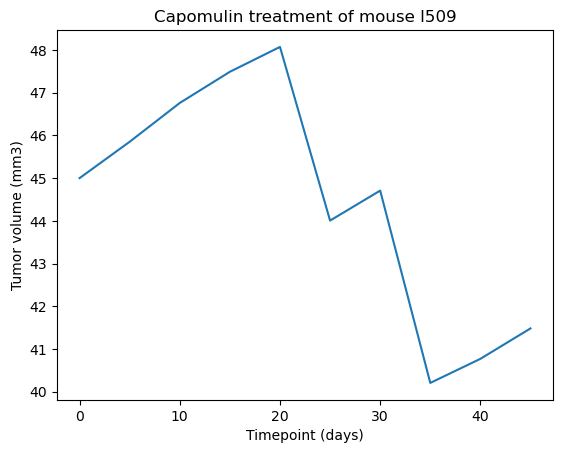

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#using mouse i509 so i can match the example in starter code
#mouse=df[(df['Mouse ID']=='l509')]
#mouse

#df[(df['Drug Regimen']=='Capomulin')]['Mouse ID'].unique()
dfline=df[(df['Mouse ID']=='l509')].loc[:,['Tumor Volume (mm3)','Timepoint']]
#dfline.plot(dfline['Timepoint'],dfline['Tumor Volume (mm3)'])
#v=dfline['Tumor Volume (mm3)']
#t=dfline['Timepoint']
plt=dfline.plot.line(x='Timepoint',
                 y='Tumor Volume (mm3)',title='Capomulin treatment of mouse l509',
                 xlabel='Timepoint (days)',
                 ylabel='Tumor volume (mm3)',
                 legend=False,grid=False,
                )
plt.set_facecolor('w')

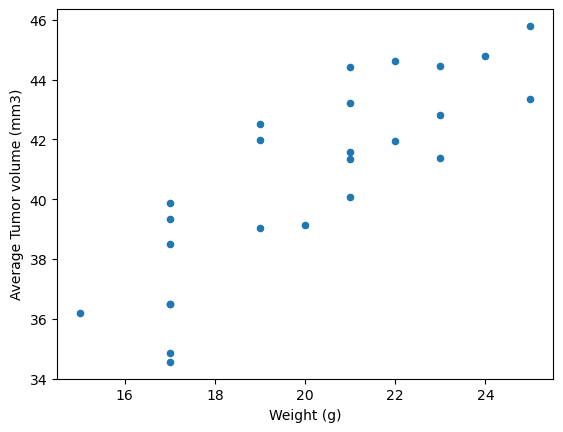

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
dfscatter=df[(df['Drug Regimen']=='Capomulin')].groupby('Mouse ID').mean(numeric_only=True).loc[:,['Tumor Volume (mm3)','Weight (g)']]
plt=dfscatter.plot.scatter(
                x='Weight (g)',
                y='Tumor Volume (mm3)',
                #title='Capomulin treatment of mouse l509',
                xlabel='Weight (g)',
                ylabel='Average Tumor volume (mm3)',
                legend=False,grid=False,
                )
plt.set_facecolor('w')

## Correlation and Regression

<Axes: title={'center': 'The correlation between mouse weight and the average tumor volume is 0.84'}, xlabel='Weight (g)', ylabel='Average Tumor volume (mm3)'>

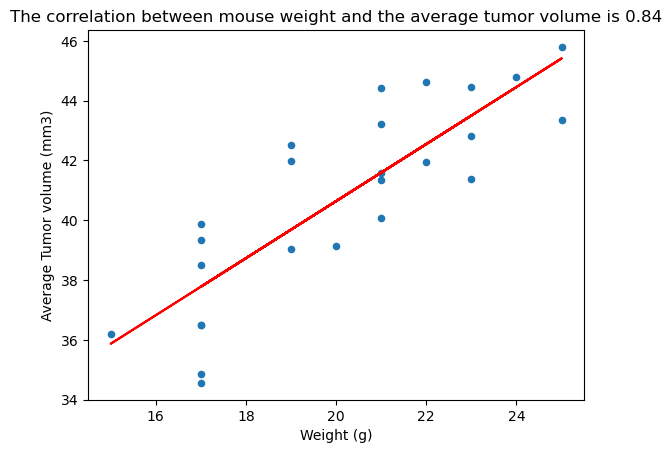

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
dfvolumeweight=df[(df['Drug Regimen']=='Capomulin')].groupby('Mouse ID').mean(numeric_only=True).loc[:,['Tumor Volume (mm3)','Weight (g)']]
lr=st.linregress(y=dfvolumeweight['Tumor Volume (mm3)'],x=dfvolumeweight['Weight (g)'])
dfvolumeweight['lr']=lr[0]*dfvolumeweight['Weight (g)']+lr[1]
phrase='The correlation between mouse weight and the average tumor volume is %s'%round(lr[2],2)
plt2=dfvolumeweight.plot.scatter(
                x='Weight (g)',
                y='Tumor Volume (mm3)',
                title=phrase,
                xlabel='Weight (g)',
                ylabel='Average Tumor volume (mm3)',
                legend=False,grid=False,
                )
plt2.set_facecolor('w')
dfvolumeweight.plot(
                x='Weight (g)',
                y='lr',
                ax=plt2,
                color='red',
                legend=False,
)